In [ ]:
# 1단계 (다운완료)
!apt install fonts-nanum
!ls /usr/share/fonts/truetype/nanum/

# 2단계
import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font = fm.FontProperties(fname=font_path, size=9)
fm._rebuild()

# 3단계 (수동으로 런타임 재시작을 안 해도 됨, 실행버튼은 다시 눌러야 함.)
import os
os.kill(os.getpid(), 9)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,714 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 155680 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
NanumBarunGothicBold.ttf  NanumMyeongjoBold.ttf  NanumSquareRoundR.ttf
NanumBarunGothi

# 환경세팅

- 나눔고딕 폰트 설치
- 구글 드라이브 연결
- 데이터 로딩

In [ ]:
# 4단계 (최종설정)
import os
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=font_path, size=9).get_name()
fm._rebuild()

In [ ]:
# sns 설정
sns.set(font=font_name, 
        rc={"axes.unicode_minus":False, 'figure.figsize': (10,6)},    
        style='darkgrid') # style="whitegrid"

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
base_path = "/gdrive/MyDrive/Colab Notebooks/LPOINT_BIG_COMP/LPOINT_BIG_COMP_csv_agg/"

In [ ]:
file_path_dic = {
    'demo':'LPOINT_BIG_COMP_01_DEMO.csv',
    'pdde':'LPOINT_BIG_COMP_02_PDDE.csv',
    'cop_u':'LPOINT_BIG_COMP_03_COP_U.csv',
    'pd_clac':'LPOINT_BIG_COMP_04_PD_CLAC.csv',
    'br':'LPOINT_BIG_COMP_05_BR.csv',
    'lpay':'LPOINT_BIG_COMP_06_LPAY.csv',
}

In [ ]:
df_demo = pd.read_csv(os.path.join(base_path, file_path_dic['demo']))

df_pdde = pd.read_csv(os.path.join(base_path, file_path_dic['pdde']), dtype={'br_c':str, 'de_dt':str, 'de_hr':str})
df_pdde_clean = df_pdde[~df_pdde.duplicated()].reset_index(drop=True)
df_pdde_clean = pd.concat((df_pdde_clean[['cust', 'rct_no', 'chnl_dv', 'cop_c', 'br_c', 'pd_c', 'buy_am', 'buy_ct']], 
           pd.to_datetime(df_pdde_clean.de_dt.str.cat(df_pdde_clean.de_hr), format='%Y%m%d%H').rename('buy_dt')), axis=1)
df_pdde = df_pdde_clean.set_index('buy_dt').sort_index()

df_cop_u = pd.read_csv(os.path.join(base_path, file_path_dic['cop_u']), dtype={'br_c':str, 'de_dt':str, 'de_hr':str})
df_cop_u = pd.concat((df_cop_u[['cust', 'rct_no', 'cop_c', 'br_c', 'buy_am']], 
           pd.to_datetime(df_cop_u.de_dt.str.cat(df_cop_u.de_hr), format='%Y%m%d%H').rename('buy_dt')), axis=1).set_index('buy_dt').sort_index()

df_pd_clac = pd.read_csv(os.path.join(base_path, file_path_dic['pd_clac']))

df_br = pd.read_csv(os.path.join(base_path, file_path_dic['br']))

df_lpay = pd.read_csv(os.path.join(base_path, file_path_dic['lpay']), dtype={'de_dt':str, 'de_hr':str})
df_lpay = pd.concat((df_lpay[['cust', 'rct_no', 'chnl_dv', 'cop_c', 'buy_am']], 
           pd.to_datetime(df_lpay.de_dt.str.cat(df_lpay.de_hr), format='%Y%m%d%H').rename('buy_dt')), axis=1).set_index('buy_dt').sort_index()

# 데이터 전처리

## df_buy

In [ ]:
df_buy = pd.concat([df_pdde, df_cop_u])
df_buy

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,buy_am,buy_ct
buy_dt,,,,,,,,
2021-01-01 00:00:00,M762029395,A04000119545,1.0,A04,A044918,PD0333,7000.0,1.0
2021-01-01 00:00:00,M073970063,E02000059635,2.0,A02,NaN,PD1321,2480.0,1.0
2021-01-01 00:00:00,M073970063,E02000059635,2.0,A02,NaN,PD1440,2980.0,1.0
2021-01-01 00:00:00,M073970063,E02000059635,2.0,A02,NaN,PD0436,4600.0,2.0
2021-01-01 00:00:00,M350725409,E02000058229,2.0,A02,NaN,PD1173,5880.0,1.0
...,...,...,...,...,...,...,...,...
2021-12-31 22:00:00,M716433837,21123122E012916542,NaN,E01,E010001,NaN,17770.0,NaN
2021-12-31 22:00:00,M421637803,21123122D013417945,NaN,D01,D010717,NaN,11100.0,NaN
2021-12-31 22:00:00,M176248707,21123122D010144319,NaN,D01,D010636,NaN,4900.0,NaN


aggregation **df_buy**

In [ ]:
df_buy_compact = df_buy.reset_index().groupby(['cust', 'rct_no'], as_index=False).agg({'buy_dt':'first', 'chnl_dv':'first', 'cop_c':'first', 'buy_am':'sum', 'buy_ct':'sum'}).set_index('buy_dt').sort_index()
df_buy_compact

,cust,rct_no,chnl_dv,cop_c,buy_am,buy_ct
buy_dt,,,,,,
2020-12-27 13:00:00,M495972460,20122713C012328716,NaN,C01,26000.0,0.0
2020-12-29 00:00:00,M192531170,20122900C013317930,NaN,C01,10000.0,0.0
2020-12-29 11:00:00,M039320884,20122911C011862577,NaN,C01,6500.0,0.0
2020-12-30 09:00:00,M201983289,20123009C012921880,NaN,C01,24000.0,0.0
2020-12-30 12:00:00,M205977381,20123012C011060420,NaN,C01,6500.0,0.0
...,...,...,...,...,...,...
2021-12-31 23:00:00,M209126885,A04129059539,1.0,A04,5000.0,2.0
2021-12-31 23:00:00,M182645944,E06052117103,2.0,A06,289000.0,1.0
2021-12-31 23:00:00,M452775982,A04129053601,1.0,A04,7700.0,3.0


In [ ]:
df_buy_compact.rct_no.value_counts(ascending=True)

20122713C012328716    1
A02287651320          1
A01321005696          1
A03067202398          1
21082717C014569969    1
                     ..
21050114D024187398    1
A01157504508          1
A01157544637          1
A01157646982          1
A04128958050          1
Name: rct_no, Length: 1514893, dtype: int64

In [ ]:
df_2021 = df_buy_compact.query('buy_dt >= "2021-01-01 00:00:00"')
df_2021

,cust,rct_no,chnl_dv,cop_c,buy_am,buy_ct
buy_dt,,,,,,
2021-01-01 00:00:00,M296393297,E06000103150,2.0,A06,12900.0,1.0
2021-01-01 00:00:00,M978764630,E02000052541,2.0,A02,444800.0,2.0
2021-01-01 00:00:00,M102283139,E02000055173,2.0,A02,9360.0,2.0
2021-01-01 00:00:00,M296393297,E06000106717,2.0,A06,34300.0,3.0
2021-01-01 00:00:00,M102283139,E06000100696,2.0,A06,32900.0,1.0
...,...,...,...,...,...,...
2021-12-31 23:00:00,M209126885,A04129059539,1.0,A04,5000.0,2.0
2021-12-31 23:00:00,M182645944,E06052117103,2.0,A06,289000.0,1.0
2021-12-31 23:00:00,M452775982,A04129053601,1.0,A04,7700.0,3.0


## df_pdde

클렌징 결과
  - 전체 4,381,743 건
  - 클렌징 후 1,266,589 건

In [ ]:
print((df_pdde.groupby(['cust', 'rct_no']).chnl_dv.nunique() != 1).sum())
print((df_pdde.groupby(['cust', 'rct_no']).cop_c.nunique() != 1).sum())

0
0


In [ ]:
df_pdde_compact = df_pdde.reset_index().groupby(['cust', 'rct_no'], as_index=False).agg({'buy_dt':'first', 'chnl_dv':'first', 'cop_c':'first', 'buy_am':'sum', 'buy_ct':'sum'}).set_index('buy_dt').sort_index()

In [ ]:
df_pdde_compact.rct_no.value_counts(ascending=True)

A04000035215    1
A02121768586    1
A02115620503    1
A03136051256    1
A02178523983    1
               ..
A01153601256    1
A03026529338    1
E05000325375    1
A04031981572    1
E06052118403    1
Name: rct_no, Length: 1266589, dtype: int64

# 문제정의 (1) - 1

In [ ]:
#월별 구매자수
df_2021.resample('M').cust.nunique()

buy_dt
2021-01-31    19394
2021-02-28    20002
2021-03-31    20539
2021-04-30    20626
2021-05-31    21358
2021-06-30    20595
2021-07-31    20786
2021-08-31    20805
2021-09-30    20433
2021-10-31    20807
2021-11-30    20087
2021-12-31    20553
Freq: M, Name: cust, dtype: int64

Text(0.5, 1.0, '월별 구매자수')

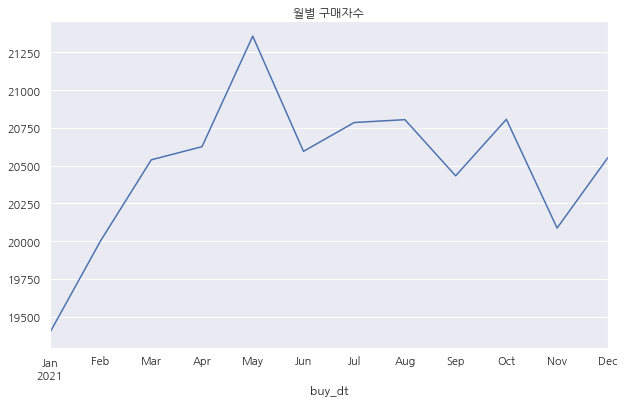

In [ ]:
#월별 구매자수-그래프
df_2021.resample('M').cust.nunique().plot()
plt.title('월별 구매자수')

In [ ]:
df_2021.resample('M').buy_am.sum()

buy_dt
2021-01-31    8.527396e+09
2021-02-28    8.511855e+09
2021-03-31    8.966854e+09
2021-04-30    9.055123e+09
2021-05-31    1.012179e+10
2021-06-30    7.790165e+09
2021-07-31    7.732687e+09
2021-08-31    8.099217e+09
2021-09-30    8.760359e+09
2021-10-31    9.355846e+09
2021-11-30    8.682425e+09
2021-12-31    8.890422e+09
Freq: M, Name: buy_am, dtype: float64

Text(0.5, 1.0, '월별 매출액')

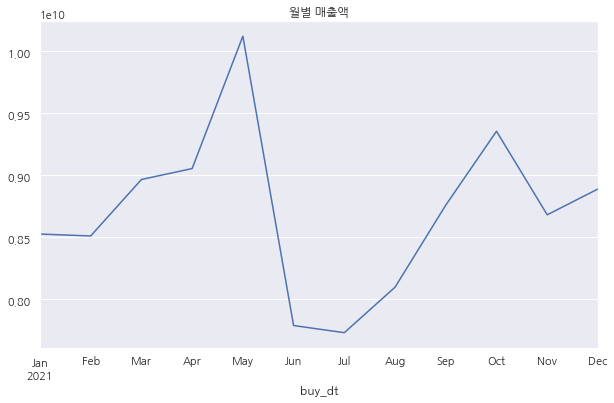

In [ ]:
#월별 매출액
df_2021.resample('M').buy_am.sum().plot()
plt.title('월별 매출액')

In [ ]:
#월별 구매당 주문 금액 추이
df_2021.resample('M').buy_am.mean()

buy_dt
2021-01-31    73837.936989
2021-02-28    71519.780622
2021-03-31    67625.376874
2021-04-30    66941.594608
2021-05-31    70227.317806
2021-06-30    61978.700917
2021-07-31    59392.203062
2021-08-31    64271.847201
2021-09-30    72653.045473
2021-10-31    72339.758320
2021-11-30    76550.421492
2021-12-31    72217.615778
Freq: M, Name: buy_am, dtype: float64

Text(0.5, 1.0, '월별 구매당 주문 금액추이')

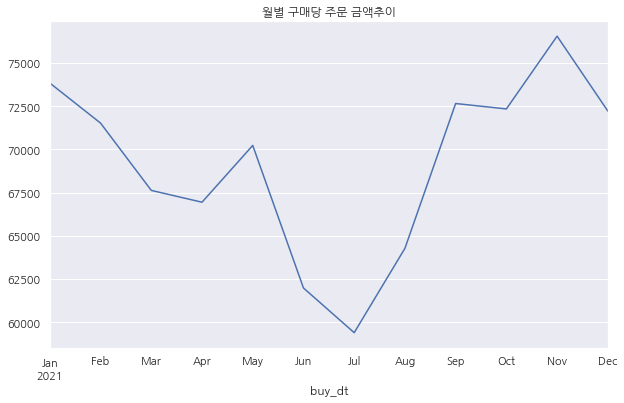

In [ ]:
#월별 구매당 주문 금액 추이
df_2021.resample('M').buy_am.mean().plot()
plt.title('월별 구매당 주문 금액추이')

# 문제정의 (1) - 2
EDA - 전체 기간동안 1인당 구매 건수

In [ ]:
df_crm_raw = (df_2021.reset_index().groupby(['rct_no'])
         .agg({'cust':'first', 'buy_dt':'first', 'buy_am':'first'}).reset_index().set_index('buy_dt'))
df_crm_raw.head(3)

,rct_no,cust,buy_am
buy_dt,,,
2021-01-01 00:00:00,21010100E012237934,M418948906,3874.0
2021-01-01 01:00:00,21010101C014916264,M249037492,18000.0
2021-01-01 01:00:00,21010101E012118029,M610884729,12030.0


In [ ]:
df_crm = (df_crm_raw.groupby(['cust'])
          .agg({'rct_no': lambda num: num.nunique(), 'buy_am':'sum'}))
df_crm.columns=['frequency', 'monetary']
df_crm.head(3)

,frequency,monetary
cust,,
M000034966,13,616240.0
M000059535,1,46000.0
M000136117,85,27559530.0


In [ ]:
df_crm.frequency.describe([0.01, 0.25, 0.50, 0.75, 0.99])

count    29756.000000
mean        50.908590
std         59.416786
min          1.000000
1%           1.000000
25%         11.000000
50%         34.000000
75%         69.000000
99%        248.000000
max       3032.000000
Name: frequency, dtype: float64

In [ ]:
print('한 번만 구매한 cust', len(df_crm[df_crm.frequency == 1]))

한 번만 구매한 cust 1908


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


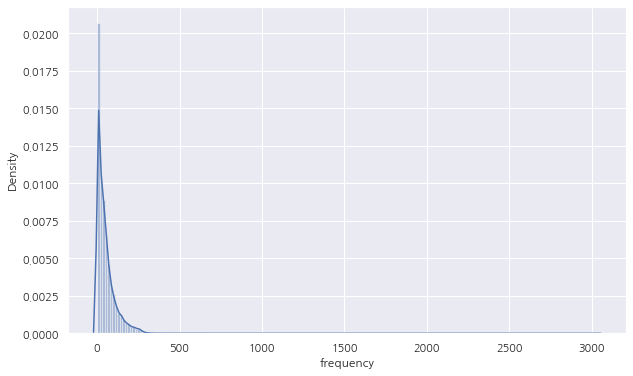

In [ ]:
sns.distplot(df_crm['frequency'], bins=200)

# 문제 정의 (2)

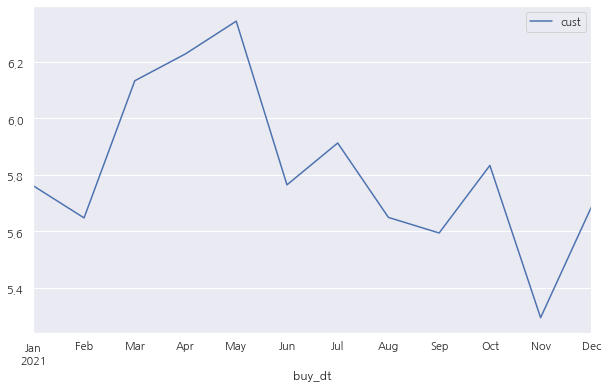

In [ ]:
# 월별 인당 구매 건수
df_pdde_compact.resample('M').agg({"cust": lambda x: x.value_counts().mean()}).plot()

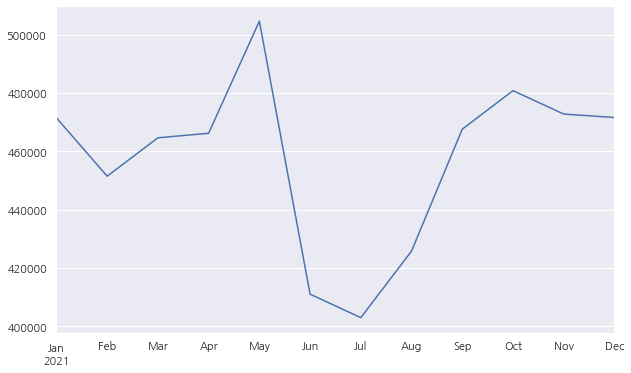

In [ ]:
# 월별 인당 구매 금액
pd.Series({name:group.groupby(['cust']).buy_am.sum().mean() for name, group in df_pdde_compact.resample('M')}).plot()

# RFM 가중치 선정이유

월별 매출액

- 5월: 9,680,000,000 원

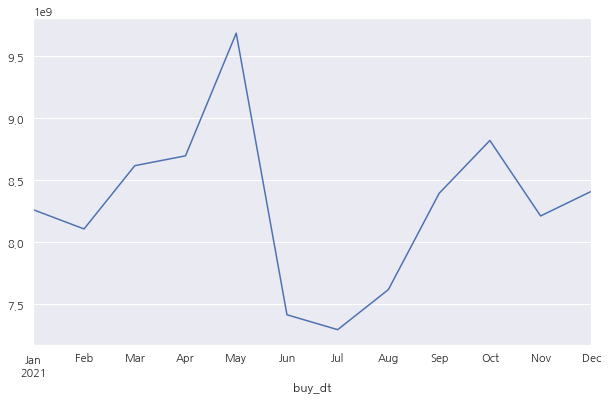

In [ ]:
df_pdde_compact.resample('M').buy_am.sum().plot()

월별 구매당 주문 금액 추이

- 8월 이후 크게 증가 (7월 68,000원 이던게 11월 89,000 초과)

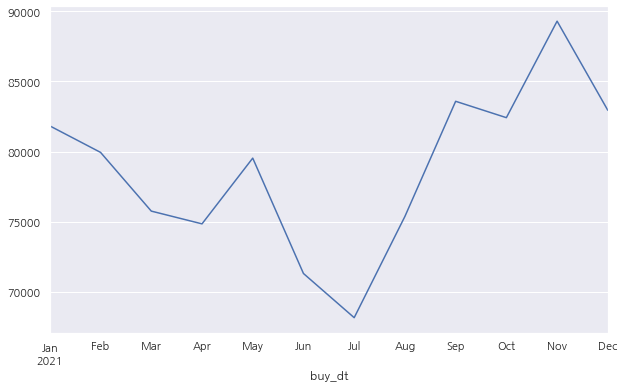

In [ ]:
df_pdde_compact.resample('M').buy_am.mean().plot()

# LGBM 데이터셋에 제휴사 추가한 이유

## 상품구매정보 월별 구매 통계

월별 유통사별 구매건수 추이

- A04: 6월부터 비중이 갑자기 확대
- A06: 6월 이후 비중 갑자기 축소

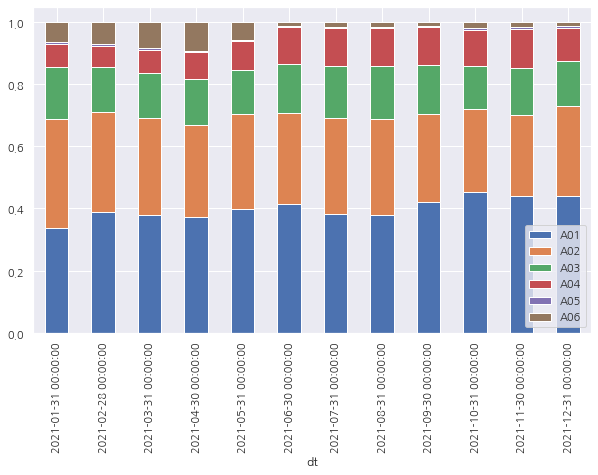

In [ ]:
seq = []
for name, group in r:
    dic = group.cop_c.value_counts(normalize=True).to_dict()
    dic.update({'dt':name})
    seq.append(dic)

pd.DataFrame.from_records(seq).set_index('dt')[[f'A0{i+1}' for i in range(6)]].plot.bar(stacked=True)

# 제휴사이용정보 월별 구매 통계

월별 제휴사별 이용건수 추이
- F&B 비중 축소 (D01, D02)
- 엔터테인먼트 비중 확대 (C01, C02)
- 숙박 큰 변동 없음
- 렌탈 축소

In [ ]:
df_x = pd.concat((df_cop_u.reset_index()['buy_dt'].dt.strftime('%Y-%m').rename('buy_month'), df_cop_u[['cust','cop_c', 'buy_am']].reset_index()),axis=1)

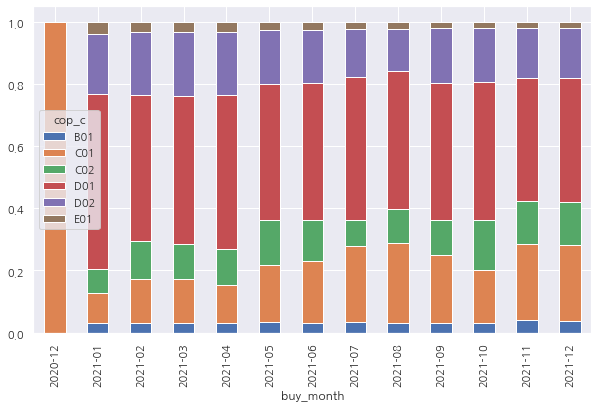

In [ ]:
df_x.groupby(['buy_month', 'cop_c']).buy_am.count().unstack('cop_c').fillna(0).div(df_x.groupby(['buy_month', 'cop_c']).buy_am.count().unstack('cop_c').fillna(0).sum(axis=1), axis=0).plot.bar(stacked=True)